In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import numpy as np
from collections import defaultdict
import pickle
import os
dataset_name = 'ytc'
folder = "../exp/" + dataset_name
selected = {'ytc': 5.5, 'fma_small': 7, 'gtzan': 5.8}[dataset_name]
df = pd.read_csv(os.path.join(folder, "tf.csv"))

In [19]:
with open(os.path.join(folder, 'DF.pickle'), 'rb') as handle:
    DF = defaultdict(int, pickle.load(handle))
with open(os.path.join(folder, 'docs.pickle'), 'rb') as handle:
    docs = pickle.load(handle)

N = len(docs.keys())
doc_frequency_df = pd.DataFrame.from_dict(DF, orient='index')
doc_frequency_df.columns = ['DF']
idfs = np.log(N / (doc_frequency_df['DF'] + 1))

In [20]:
df['idf'] = idfs[df.term].values
df['tf_idf'] = df.tf * df.idf

In [22]:
#selected = 7
print('selected=', selected, '; max idf=', df.idf.max())

selected= 5.5 ; max idf= 6.642486801367256


In [5]:
df['tf_idf_round'] = df['tf_idf'].round(1)
df['idf_round'] = df['idf'].round(1)
dfn2 = df.groupby('idf_round').count()
dfn = df.groupby('tf_idf_round').count()

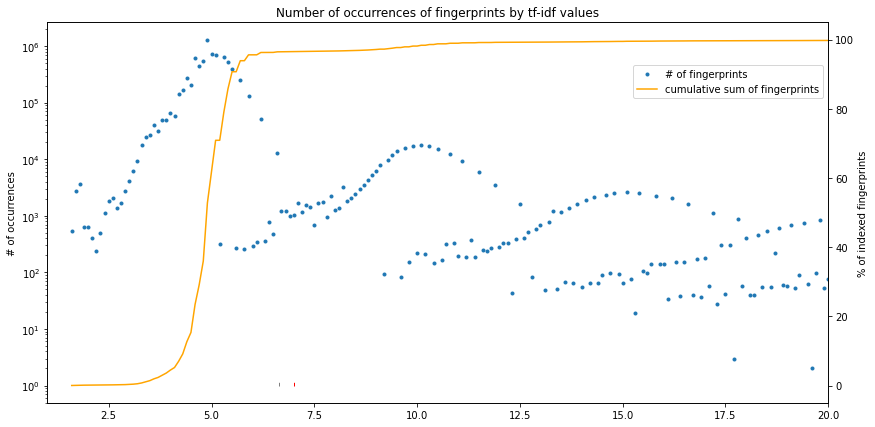

In [6]:
fig, ax1 = plt.subplots(figsize=(14, 7))
ax2 = ax1.twinx()

#plt.hist(df.tf_idf_round, bins=300)
lns1 = ax1.plot(dfn.index, dfn.term, '.', label='# of fingerprints')
lns2 = ax2.plot(100*dfn.tf.cumsum()/dfn.tf.sum(), color='orange', label='cumulative sum of fingerprints')

ax2.vlines(df.idf.max(), 0, 1.1, linestyles='--', color='gray', linewidth=1)
ax2.vlines(selected, 0, 1.1, color='red', linewidth=1, linestyles='--')
#ax1.plot(dfn2.index, dfn2.term)

plt.title("Number of occurrences of fingerprints by tf-idf values")
ax1.set_yscale('log')
ax1.set_xlim((1, 20))
ax1.set_ylabel('# of occurrences')
ax2.set_ylabel('% of indexed fingerprints')
lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc='upper right', bbox_to_anchor=(1, 0.9))
#plt.savefig('fgpt_by_tfidf.pdf')
plt.show()


In [7]:
df['idf_round'] = df['idf'].round(2)
dfn2 = df.groupby('idf_round').count()

In [8]:
df_rank = df.groupby('term').sum().reset_index(drop=False)
df_rank['rank'] = df_rank.tf.rank(ascending=False)
df_rank = df_rank[['term', 'tf', 'rank']].sort_values('rank', ascending=True).reset_index(drop=True)

In [9]:
df_rank2 = df.groupby('term').count().reset_index(drop=False)
df_rank2['rank'] = df_rank2.tf.rank(ascending=False)
df_rank2 = df_rank2[['term', 'tf', 'rank']].sort_values('rank', ascending=True).reset_index(drop=True)

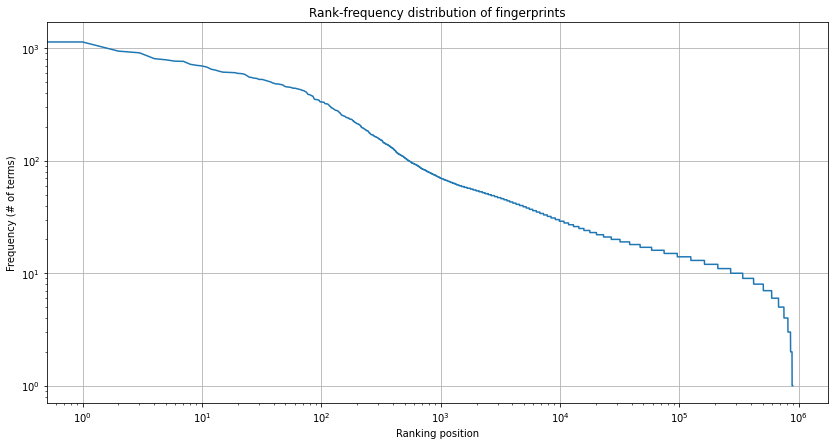

In [10]:
plt.figure(figsize=[14, 7])
plt.plot(df_rank.tf, label='hashes in unique documents')
#plt.plot(df_rank2.tf, label='hashes in database', alpha=0.7)
plt.title('Rank-frequency distribution of fingerprints')
plt.grid()
plt.yscale('log')
plt.xscale('log')
plt.xlabel("Ranking position")
plt.ylabel("Frequency (# of terms)")
#plt.savefig('rank_freq_distr.pdf')
#plt.xlim((1, 30))
plt.show()